<h4>Description of the dataset</h4>

The dataset __campaign.csv__ contains a full day of impressions for one particular mobile campaign. Each row corresponds to an impression. The characteristics of each impression are presented in columns and we are more particularly interested in the outcome of the impression: the occurrence of a click or the occurrence of a conversion following a click. The list of columns is classified below by topic:

unixtimestamp of impression <br/>
admantx <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
exelate <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
browserHeight / browserWidth / deviceHeight / deviceWidth / documentHeight / documentWidth last24hClicks / last24hClicksOnAdvertiser / ... <span style="color:gray">(historic interactions of given user with our inventory)</span> <br/>
browserLanguage / browserName / os <br/>
adSpaceId / adSpacePrimaryThematic <br/>
city <br/>
formatId / containerId / advertiserId / creativeId <br/>
deviceReferrer <br/>
click <br/>
conversion <br/>

 _Task_

Read and clean the dataset (remove missing values, select relevant columns, and convert column types if necessary).

Explore data, create visualizations, and look for patterns. 

Use a statistical method that can identify the factors (features, columns) which seem to be the most influential for a click occurrence.


In [1]:
# your code
# your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading my csv file
data = pd.read_csv('campaign.csv')
data


,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Joeuf,NEWS,other,111,8338,310,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.00,0.0,...,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Barbey,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962968,1493423924,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Asnieres-sur-seine,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
962969,1493423933,43.152,0.0,0.0,0.0,0.0,0.000,0.0,12.96,0.0,...,iOS,Levallois-perret,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
962970,1493423966,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Levallois-perret,NEWS,other,111,8338,310,24595,0,0
962971,1493423974,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,iOS,Athee-sur-cher,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0


---

In [2]:
#to check the SUM OF missing values in a databasese
data.isnull().sum()

timestamp                        0
admantx_art_and_entertainment    0
admantx_automotive               0
admantx_business                 0
admantx_careers                  0
                                ..
containerId                      0
advertiserId                     0
creativeId                       0
click                            0
conversion                       0
Length: 135, dtype: int64

In [3]:
#using info() method with verbose to get the complete column details

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Data columns (total 135 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    timestamp                            int64  
 1    admantx_art_and_entertainment        float64
 2    admantx_automotive                   float64
 3    admantx_business                     float64
 4    admantx_careers                      float64
 5    admantx_education                    float64
 6    admantx_family_and_parenting         float64
 7    admantx_health_and_fitness           float64
 8    admantx_food_and_drink               float64
 9    admantx_hobbies_and_interests        float64
 10   admantx_home_and_garden              float64
 11   admantx_law_govt_and_politics        float64
 12   admantx_news                         float64
 13   admantx_finance                      float64
 14   admantx_society                      float64
 15   admantx_science

In [4]:
#Data Cleaning -taking only the columns required for my analysis and dropping rest of them

data.drop(columns=[
                 "last24hAdClosingsOnAdvertiser","last24hAdClosingsOnContainer","last24hAdClosingsOnFormat",
                 "last30minClicksOnAdvertiser","last30minClicksOnContainer","last30minClicksOnFormat",
                 "last30minIframeClosingsOnAdvertiser","last30minIframeClosingsOnContainer","last30minIframeClosingsOnFormat",
                 "last30minImpressionsOnAdvertiser","last30minImpressionsOnContainer","last30minImpressionsOnFormat",
                 "last30minAdClosingsOnAdvertiser","last30minAdClosingsOnContainer","last30minAdClosingsOnFormat",
                 "last7dClicksOnAdvertiser","last7dClicksOnContainer","last7dClicksOnFormat",
                 "last7dIframeClosingsOnAdvertiser","last7dIframeClosingsOnContainer","last7dIframeClosingsOnFormat",
                 "last7dImpressionsOnAdvertiser","last7dImpressionsOnContainer","last7dImpressionsOnFormat",
                 "last7dAdClosingsOnAdvertiser","last7dAdClosingsOnContainer","last7dAdClosingsOnFormat",
                 "last30dClicksOnAdvertiser","last30dClicksOnContainer","last30dClicksOnFormat",
                 "last30dIframeClosingsOnAdvertiser","last30dIframeClosingsOnContainer","last30dIframeClosingsOnFormat",
                 "last30dImpressionsOnAdvertiser","last30dImpressionsOnContainer","last30dImpressionsOnFormat",
                 "last30dAdClosingsOnAdvertiser","last30dAdClosingsOnContainer","last30dAdClosingsOnFormat",
                 "formatId","containerId","advertiserId","creativeId"],
         axis=1,inplace=True)

data

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,last30dAdClosings,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,deviceReferrer,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,1170,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,616,fr,Mobile Safari,iOS,Joeuf,NEWS,other,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.00,0.0,...,0,5172,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,1219,fr,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,5172,fr,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,other,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962968,1493423924,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,1772,fr,Facebook,iOS,Asnieres-sur-seine,ART_AND_ENTERTAINMENT,other,0,0
962969,1493423933,43.152,0.0,0.0,0.0,0.0,0.000,0.0,12.96,0.0,...,0,4417,fr,Facebook,iOS,Levallois-perret,ART_AND_ENTERTAINMENT,other,0,0
962970,1493423966,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,1822,fr,Mobile Safari,iOS,Levallois-perret,NEWS,other,0,0
962971,1493423974,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0,5209,fr,Facebook,iOS,Athee-sur-cher,ART_AND_ENTERTAINMENT,other,0,0


In [5]:
#to generate summary statistics for a dataset.
data.describe()

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,last7dIframeClosings,last7dImpressions,last7dAdClosings,last30dClicks,last30dIframeClosings,last30dImpressions,last30dAdClosings,adSpaceId,click,conversion
count,9.629730e+05,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,...,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.000000,962973.00000,962973.000000,962973.000000
mean,1.493390e+09,9.180603,0.320357,0.604956,0.253501,0.100404,0.628993,0.764869,0.666523,0.539791,...,0.000050,0.127195,0.071883,0.013491,0.000074,0.189398,0.116195,3149.22899,0.098368,0.000433
std,1.964874e+04,24.588960,3.780642,5.068239,2.519138,1.967956,5.449021,6.305687,5.726105,4.835396,...,0.007761,0.855731,0.450744,0.160802,0.009932,1.915646,1.238772,1836.45527,0.297812,0.020805
min,1.493338e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,569.00000,0.000000,0.000000
25%,1.493371e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1750.00000,0.000000,0.000000
50%,1.493392e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2254.00000,0.000000,0.000000
75%,1.493408e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5172.00000,0.000000,0.000000
max,1.493424e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,2.000000,124.000000,35.000000,26.000000,2.000000,258.000000,140.000000,6166.00000,1.000000,1.000000


In [6]:
#creating a new column datetime and time from timestamp to know exactly at what time or date a specific action has occured
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
data['time'] = data['datetime'].dt.strftime("%H:%M:%S")
data["datetime"].head()
data.head(20)

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,browserLangage,browserName,os,city,adSpacePrimaryThematic,deviceReferrer,click,conversion,datetime,time
0,1493337601,41.837,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:00:01,00:00:01
1,1493337602,14.431,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Mobile Safari,iOS,Joeuf,NEWS,other,0,0,2017-04-28 00:00:02,00:00:02
2,1493337615,63.729,0.000,0.0,0.0,0.0,5.109,0.000,0.0,0.000,...,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:00:15,00:00:15
3,1493337703,43.345,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:01:43,00:01:43
4,1493337828,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:03:48,00:03:48
5,1493337837,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Mobile Safari,iOS,Strasbourg,ART_AND_ENTERTAINMENT,other,1,0,2017-04-28 00:03:57,00:03:57
6,1493337861,100.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Mobile Safari,iOS,Tours,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:04:21,00:04:21
7,1493338170,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Mobile Safari,iOS,Bondy,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:09:30,00:09:30
8,1493338245,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:10:45,00:10:45
9,1493338309,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,fr,Facebook,iOS,Courbevoie,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:11:49,00:11:49


In [7]:
#we are creating a pivot table with the adSpacePrimaryThematic column as the index, and the last30dImpressions, last30dClicks, and conversion columns as the values. 
#We are also using the sum aggregation function to calculate the sum of the values in each group.
ds = data.pivot_table(index='adSpacePrimaryThematic', values=['last30dImpressions','last30dClicks','conversion'], aggfunc=['sum'])
ds

sum                                 
                         conversion last30dClicks last30dImpressions
adSpacePrimaryThematic                                              
ART_AND_ENTERTAINMENT           198          7711              84545
AUTOMOTIVE                        2             1                 23
BUSINESS                          8            87               1995
CAREERS                           1            31                395
EDUCATION                         2            31                518
FAMILY_AND_PARENTING              6            72                712
FINANCE                           0             0                  1
FOOD_AND_DRINK                    0             9                 29
HEALTH_AND_FITNESS                1             5                107
HOBBIES_AND_INTERESTS             0             0                  3
HOME_AND_GARDEN                   2             5                 73
NEWS                            110          2434              52592
NONE                             20           656               3939
REAL_ESTATE                       0            30                440
SOCIETY                          24           800              11485
SPORTS                           22           820              20332
STYLE_AND_FASHION                15            92               1577
TECHNOLOGY_AND_COMPUTING          6           207               3619

In [26]:
#Creating a column for calculating CTR ad Coversionrate FOR LAST 30 DAYS clicks and impressions
ds["CTR"]=(ds.iloc[:,1] /ds.iloc[:,2])*100
ds["Conversion_rate"]=(ds.iloc[:,0] /ds.iloc[:,1])*100
ds

sum                                   \
                         conversion last30dClicks last30dImpressions   
adSpacePrimaryThematic                                                 
ART_AND_ENTERTAINMENT           198          7711              84545   
AUTOMOTIVE                        2             1                 23   
BUSINESS                          8            87               1995   
CAREERS                           1            31                395   
EDUCATION                         2            31                518   
FAMILY_AND_PARENTING              6            72                712   
FINANCE                           0             0                  1   
FOOD_AND_DRINK                    0             9                 29   
HEALTH_AND_FITNESS                1             5                107   
HOBBIES_AND_INTERESTS             0             0                  3   
HOME_AND_GARDEN                   2             5                 73   
NEWS                            110          2434              52592   
NONE                             20           656               3939   
REAL_ESTATE                       0            30                440   
SOCIETY                          24           800              11485   
SPORTS                           22           820              20332   
STYLE_AND_FASHION                15            92               1577   
TECHNOLOGY_AND_COMPUTING          6           207               3619   

                                CTR conversionrate Conversion_rate  
                                                                    
adSpacePrimaryThematic                                              
ART_AND_ENTERTAINMENT      9.120587       2.567760        2.567760  
AUTOMOTIVE                 4.347826     200.000000      200.000000  
BUSINESS                   4.360902       9.195402        9.195402  
CAREERS                    7.848101       3.225806        3.225806  
EDUCATION                  5.984556       6.451613        6.451613  
FAMILY_AND_PARENTING      10.112360       8.333333        8.333333  
FINANCE                    0.000000            NaN             NaN  
FOOD_AND_DRINK            31.034483       0.000000        0.000000  
HEALTH_AND_FITNESS         4.672897      20.000000       20.000000  
HOBBIES_AND_INTERESTS      0.000000            NaN             NaN  
HOME_AND_GARDEN            6.849315      40.000000       40.000000  
NEWS                       4.628080       4.519310        4.519310  
NONE                      16.653973       3.048780        3.048780  
REAL_ESTATE                6.818182       0.000000        0.000000  
SOCIETY                    6.965607       3.000000        3.000000  
SPORTS                     4.033051       2.682927        2.682927  
STYLE_AND_FASHION          5.833862      16.304348       16.304348  
TECHNOLOGY_AND_COMPUTING   5.719812       2.898551        2.898551

Text(0.5, 1.0, 'CTR and Conversion Rate')

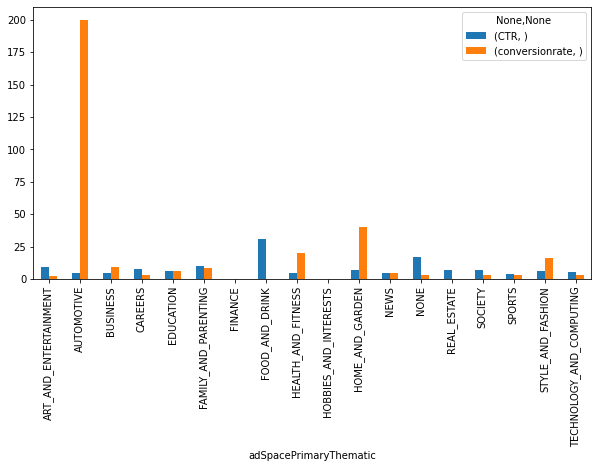

In [44]:
#ploting a graph for ctr and conversion against different adSpacePrimaryThematic.
#from the below graph we can analyse how ctr and conversion for each sector  and determine which sector performs the best
ds["CTR"] = (ds.iloc[:,1]/ds.iloc[:,2])*100
ds["conversionrate"] = (ds.iloc[:,0]/ds.iloc[:,1])*100
ds.plot.bar(y=['CTR', 'conversionrate'],figsize=(10, 5),sharex=True)
ax.set_title("CTR and Conversion Rate")

#Here from the below graph we can see automotive sectors gives the max conversions and food and food and drink  gives max ctr
#From analysing this data we can modify our marketing campaign.

In [10]:
#Creating a list to store the whole details od admmanx section
l = []
for col in data.columns:
    # Split the column name on spaces to get the first word
    first_word = col.split('_')[0]

    # Check if the first word of the column name is similar to the one you want
    if first_word.lower() == 'admantx':
        # If it is, add the column to the new dataframe
         l.append(col)

l


['admantx_art_and_entertainment',
 'admantx_automotive',
 'admantx_business',
 'admantx_careers',
 'admantx_education',
 'admantx_family_and_parenting',
 'admantx_health_and_fitness',
 'admantx_food_and_drink',
 'admantx_hobbies_and_interests',
 'admantx_home_and_garden',
 'admantx_law_govt_and_politics',
 'admantx_news',
 'admantx_finance',
 'admantx_society',
 'admantx_science',
 'admantx_pets',
 'admantx_sports',
 'admantx_style_and_fashion',
 'admantx_technology_and_computing',
 'admantx_travel',
 'admantx_real_estate',
 'admantx_shopping',
 'admantx_religion_and_spirituality']

In [11]:
#grouping the data by the click and conversion columns, and then calculating the mean of the values in each group
df1 = data.groupby(["click", "conversion"]).mean()[l].reset_index()
df1

,click,conversion,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,...,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality
0,0,0,9.171812,0.322440,0.616194,0.256261,0.100531,0.628872,0.763677,0.678594,...,6.195281,1.797000,0.072680,3.565550,1.178101,2.750351,1.966395,0.136692,0.064143,0.099939
1,1,0,9.268982,0.302046,0.500921,0.228856,0.099165,0.629554,0.776128,0.556456,...,5.761716,1.497860,0.047897,2.838992,0.938815,2.253624,1.869867,0.108513,0.064184,0.102875
2,1,1,7.496847,0.122880,0.734448,0.081861,0.115861,0.756237,0.701173,0.424782,...,5.282686,1.008177,0.056974,3.910954,0.744573,3.397405,1.730293,0.003823,0.046494,0.142410


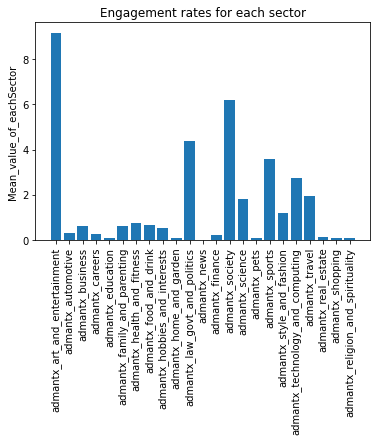

<Figure size 720x360 with 0 Axes>

In [38]:
#plotting graph of sectors for click0  and conversion 0 of admantx
g = []
click_conversion10 = df1.iloc[0,2:]
for value in click_conversion10:
    g.append(value)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.bar(l,g)
plt.xticks(rotation=90)
ax.set_ylabel("Mean_value_of_eachSector")
ax.set_title("Engagement rates for each sector")
plt.figure(figsize=(10,5))
plt.show()

#This graph represents the data for which the conversion and clicks are zero.
#By analysing this data we need to make changes in the marketing campaign.

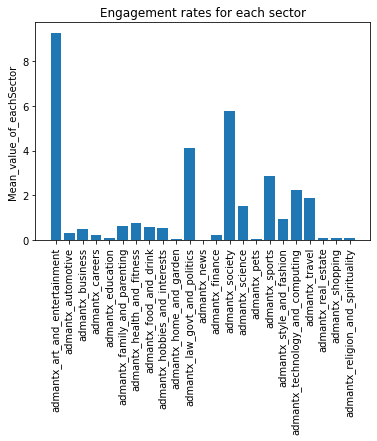

<Figure size 720x360 with 0 Axes>

In [39]:
#plotting graph of sectors for click 1  and conversion 0 of admantx
g = []
click_conversion10 = df1.iloc[1,2:]
for value in click_conversion10:
    g.append(value)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.bar(l,g)
plt.xticks(rotation=90)
ax.set_ylabel("Mean_value_of_eachSector")
ax.set_title("Engagement rates for each sector")
plt.figure(figsize=(10,5))
plt.show()
#This graph represents the data for which the conversion is 0 and clicks are 1.
#By analysing this data we need to make changes in the marketing campaign.

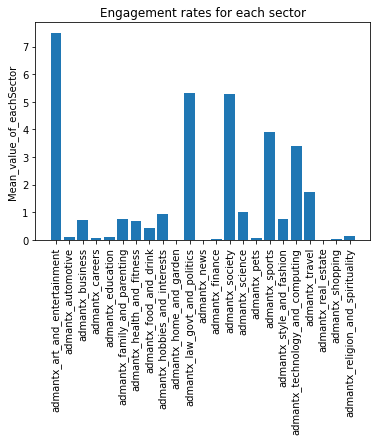

<Figure size 720x360 with 0 Axes>

In [40]:
#plotting graph of sectors for click 1  and conversion 1 of admantx
g = []
click_conversion10 = df1.iloc[2,2:]
for value in click_conversion10:
    g.append(value)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.bar(l,g)
plt.xticks(rotation=90)
ax.set_ylabel("Mean_value_of_eachSector")
ax.set_title("Engagement rates for each sector")
plt.figure(figsize=(10,5))
plt.show()
#This graph represents the data for which both the conversion and clicks are 1.
#By analysing this data we need to make changes in the marketing campaign.

In [15]:
#to show the column details of datetime
data.datetime


0        2017-04-28 00:00:01
1        2017-04-28 00:00:02
2        2017-04-28 00:00:15
3        2017-04-28 00:01:43
4        2017-04-28 00:03:48
                 ...        
962968   2017-04-28 23:58:44
962969   2017-04-28 23:58:53
962970   2017-04-28 23:59:26
962971   2017-04-28 23:59:34
962972   2017-04-28 23:59:47
Name: datetime, Length: 962973, dtype: datetime64[ns]

In [16]:
#timetotimetype() that takes a datetime value as its argument and returns a string representing the time of day. 
#The function uses a series of if statements to determine the time of day based on the value of the datetime argument
# and returns one of the following strings: "Early Morning", "Morning", "Afternoon", "Evening", or "Night".
def timetotimetype(datetime):
    datetime = str(datetime)
    if (datetime > "2017-04-28 00:00:00") and (datetime < "2017-04-28 06:00:00") :
        return 'Early Morning'
    if (datetime > "2017-04-28 06:00:00") and (datetime < "2017-04-28 12:00:00") :
        return 'Morning'
    if (datetime > "2017-04-28 12:00:00") and (datetime < "2017-04-28 15:00:00") :
        return 'afternoon'
    if (datetime > "2017-04-28 15:00:00") and (datetime < "2017-04-28 18:00:00") :
        return 'Evening'
    if (datetime > "2017-04-28 18:00:00") and (datetime < "2017-04-28 24:00:00") :
        return 'Night'
#column for daytime will be created with diff times of a day    
data["daytime"] = data["datetime"].apply(timetotimetype)
data.head()

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,browserName,os,city,adSpacePrimaryThematic,deviceReferrer,click,conversion,datetime,time,daytime
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:00:01,00:00:01,Early Morning
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,Mobile Safari,iOS,Joeuf,NEWS,other,0,0,2017-04-28 00:00:02,00:00:02,Early Morning
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,...,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:00:15,00:00:15,Early Morning
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:01:43,00:01:43,Early Morning
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,other,0,0,2017-04-28 00:03:48,00:03:48,Early Morning


In [17]:
#Creating time_relation  DataFrame that contains information about clicks, impressions, and conversions during a specific time period. 
time_relation = data.loc[:,["daytime","last30dClicks","last30dImpressions","click","conversion"]]
time_relation.head()

,daytime,last30dClicks,last30dImpressions,click,conversion
0,Early Morning,0,0,0,0
1,Early Morning,0,0,0,0
2,Early Morning,0,0,0,0
3,Early Morning,0,0,0,0
4,Early Morning,0,0,0,0


In [18]:
#CTRdf_time has been created using the pivot_table() method, which allows you to rearrange and summarize data in a DataFrame. 
#In this case,  the pivot_table() method is being used to group the data by the daytime column and 
#then sum the last30dImpressions, last30dClicks, and conversion columns.
CTRdf_time= time_relation.pivot_table(index=["daytime"], values = ["last30dImpressions","last30dClicks","conversion"], aggfunc=(sum))
CTRdf_time.head()


,conversion,last30dClicks,last30dImpressions
daytime,,,
Early Morning,21,646,10579
Evening,85,2391,34420
Morning,162,4574,66609
Night,95,4020,52104
afternoon,54,1360,18657


Text(0.5, 1.0, 'CTR and Conversion Rate by Time of Day')

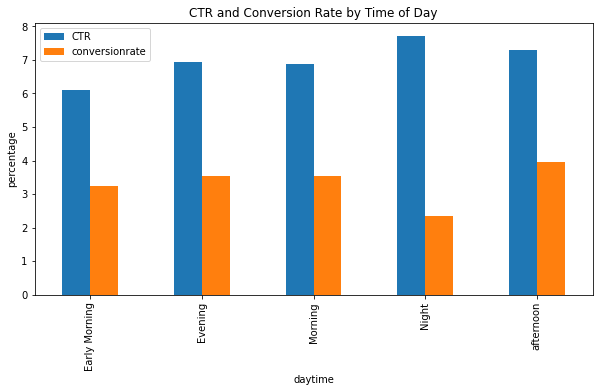

In [41]:
#to plot the graph to understand click and conversion rates for each time of a day 
CTRdf_time["CTR"] = (CTRdf_time.iloc[:,1]/CTRdf_time.iloc[:,2])*100
CTRdf_time["conversionrate"] = (CTRdf_time.iloc[:,0]/CTRdf_time.iloc[:,1])*100

CTRdf_time.plot.bar(y=['CTR', 'conversionrate'], ylabel = "percentage",figsize=(10, 5),sharex=True)

plt.title("CTR and Conversion Rate by Time of Day")
#here we fro the graph we can analyse conversion rate is higher in afternoon and CTR is generate highly in night time 

In [20]:
#Replace the city name with ? as unknown
data["city"].replace("?", "Unknown", inplace=True)

In [21]:
#checking if the required function is done using mask
mask = (data["city"] =="?")
data[mask]

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,browserName,os,city,adSpacePrimaryThematic,deviceReferrer,click,conversion,datetime,time,daytime


In [22]:
#City_ctr has been created using the pivot_table() method, 
#which allows you to rearrange and summarize data in a DataFrame.
#In this case,  the pivot_table() method is being used to group the data by the city column and then 
#sum the last30dImpressions, last30dClicks, and conversion columns.
City_ctr= data.pivot_table(index=["city"], values = ["last30dImpressions","last30dClicks","conversion"], aggfunc=(sum))

City_ctr.drop(City_ctr[City_ctr["conversion"] == 0].index, inplace=True)
City_ctr = City_ctr.sort_values("conversion",ascending= False)

In [23]:
City_ctr.head(12)

,conversion,last30dClicks,last30dImpressions
city,,,
Paris,138,3213,44323
Orange,82,417,5876
Aubervilliers,56,503,7480
Courbevoie,30,234,3593
Latresne,22,110,1919
Garches,19,185,2520
Mions,13,91,1724
Toulouse,11,227,3708
Villeurbanne,5,103,2003


In [24]:
#sorting according to conversion value
City_ref_conversion = City_ctr.head(12).sort_values("conversion",ascending = True)
City_ref_conversion.head(12)

,conversion,last30dClicks,last30dImpressions
city,,,
Boulogne-billancourt,2,60,671
Clichy,2,61,756
Strasbourg,4,129,1786
Villeurbanne,5,103,2003
Toulouse,11,227,3708
Mions,13,91,1724
Garches,19,185,2520
Latresne,22,110,1919
Courbevoie,30,234,3593


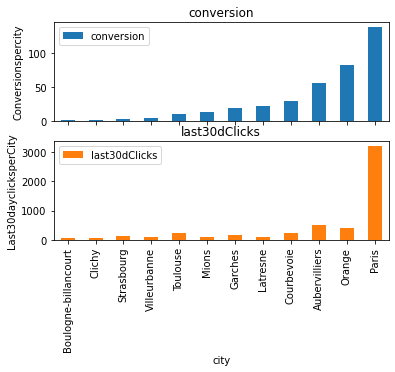

In [25]:
#Creating a bar chart that shows the number of conversions and clicks per city in the City_ref_conversion DataFrame. 
#The purpose of this chart is to visualize the relationship between clicks and conversions for different cities.
import pandas as pd
import matplotlib.pyplot as plt
axes= City_ref_conversion.plot.bar(y=["conversion","last30dClicks"],subplots=True,sharex=True)
for ax, label in zip(axes, ['Conversionspercity', 'Last30dayclicksperCity']):
    ax.set_ylabel(label)
    
#from the below analysis and trends we can see that paris is the city where conversion is high with most last30dayclicks

In [27]:
# create a list of the column names you want to include in the new dataframe
click_cols = ['click','conversion','browserHeight', 'browserWidth', 'deviceHeight', 'deviceWidth','last30dClicks','last30dImpressions','browserLangage','browserName','city','time']

# create a new dataframe by selecting the columns from the original dataframe
new_df = data[click_cols ]
corr_click = new_df.corr()['click'].reset_index(name = 'corr_click')
corr_click = corr_click.sort_values(by=['corr_click'],ascending = False).head(10)
corr_click

,index,corr_click
0,click,1.000000
1,conversion,0.063015
6,last30dClicks,0.020147
7,last30dImpressions,-0.002115
3,browserWidth,-0.087190
2,browserHeight,-0.089015
5,deviceWidth,-0.137756
4,deviceHeight,-0.137924


Text(0.5, 1.0, 'Correlation Heatmap for clicks')

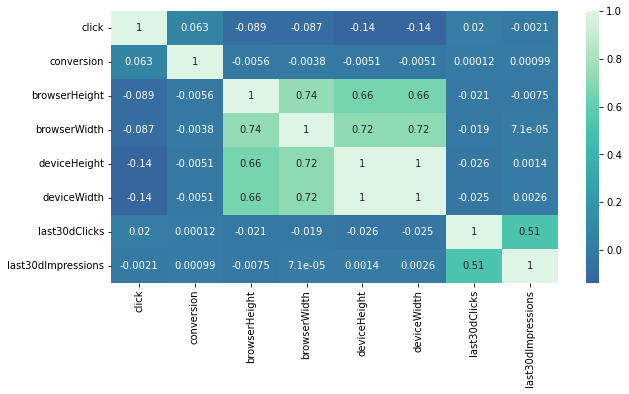

In [43]:
# It returns a new DataFrame containing the correlations between each pair of columns. The values in the returned DataFrame will range from 
#-1 to 1, with -1 indicating a strong negative correlation and 1 indicating a strong positive correlation. 
corr = new_df.corr()

# Plot a heatmap showing the correlation between the columns to know and  understand  which all factors leads to click
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True,cmap="mako",center=0)
ax.set_title("Correlation Heatmap for clicks")